In [1]:
from gmbp_common.utils.notebook_utils import set_width_global, disable_auto_scroll
set_width_global()
disable_auto_scroll()

import gmbp_common.utils.datetime_utils as dtu
from gmbp_quant.research.crypto.dca.dca import calc_dca, get_historical_prices, calc_bias

import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>

## Get Historical Prices

In [2]:
historical_prices = get_historical_prices(symbol='BTCUSD', data_source='FMP')

<AxesSubplot:xlabel='date'>

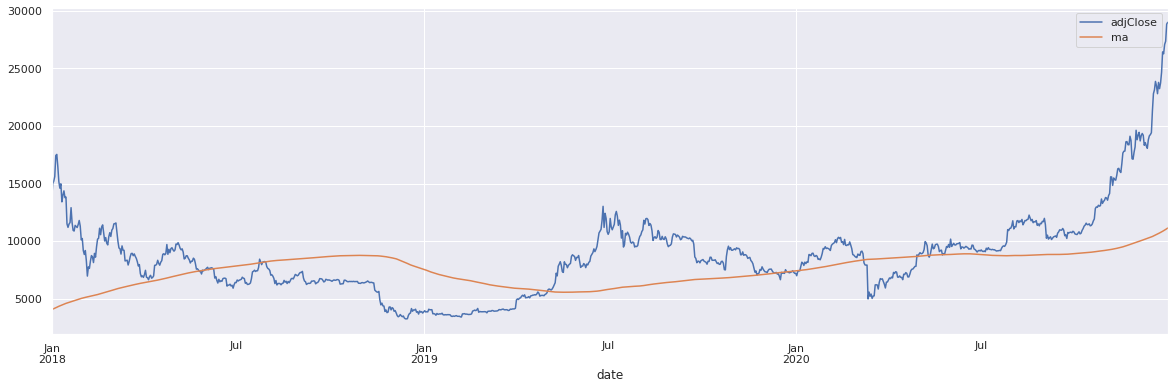

In [8]:
start_dateid = 20180101
end_dateid = 20201231
ma_ndays = 365

hp = calc_bias(daily_prices=historical_prices, ma_ndays=ma_ndays, close_price_col='adjClose')
hp.set_index('date').loc[dtu.dateid_to_datestr(start_dateid, sep='-'):dtu.dateid_to_datestr(end_dateid, sep='-')][['adjClose','ma']].plot(figsize=(20,6))

## DCA by FIXED_AMOUNT

In [18]:
config = {'strategy': 'FIXED_AMOUNT',
          'ma_ndays': ma_ndays,
          'start_dateid': start_dateid,
          'end_dateid': end_dateid,
          'dca_base_amount': 100.0,
          'markup_ratio': 0.4,
          'growth_rate': 0.7}

dca_fixed_amount = calc_dca(historical_prices=historical_prices, config=config)
dca_fixed_amount.tail(5)

,date,adjClose,day_of_week,ma,bias,bias_mean,bias_std,di,investment_ratio,amount,sided_qty,cum_sided_qty,nmv,cum_amount,investment_gain_ratio,ttm,fv,cum_fv
1091,2020-12-27,26272.294922,6,10899.554297,1.410401,0.224098,0.341257,3.476270,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1092,2020-12-28,27084.808594,0,10953.423217,1.472725,0.228116,0.347265,3.584031,1.0,100.0,0.002637,1.509522,40885.1072,15700.0,2.604147,3,100.437085,38704.839362
1093,2020-12-29,27362.437500,1,11008.407990,1.485594,0.232220,0.353216,3.548467,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1094,2020-12-30,28840.953125,2,11067.715810,1.605863,0.236694,0.360194,3.801193,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1095,2020-12-31,29001.720703,3,11127.446074,1.606323,0.241171,0.366990,3.719863,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


<AxesSubplot:xlabel='date'>

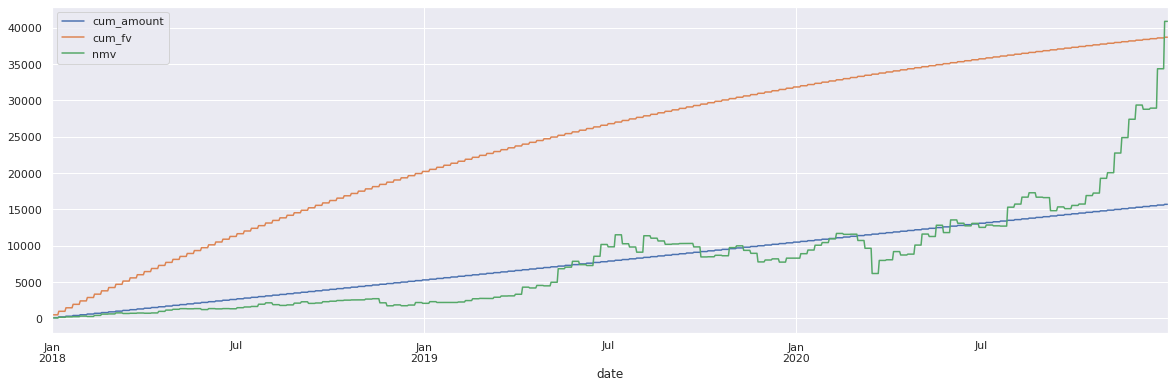

In [16]:
dca_fixed_amount.set_index('date')[['cum_amount','cum_fv','nmv']].fillna(method='ffill').plot(figsize=(20,6))

## DCA by BIAS_GRID_EQUAL_SIZE (long only)

In [17]:
config = {'strategy': 'BIAS_GRID_EQUAL_SIZE',
          'ma_ndays': ma_ndays,
          'allow_sell': False,
          'start_dateid': start_dateid,
          'end_dateid': end_dateid,
          'dca_base_amount': 100.0,
          'markup_ratio': 0.4,
          'investment_ratio_interval': 0.3,
          'growth_rate': 0.9}

dca_bges_long = calc_dca(historical_prices=historical_prices, config=config)
dca_bges_long.tail()

,date,adjClose,day_of_week,ma,bias,bias_mean,bias_std,di,investment_ratio,amount,sided_qty,cum_sided_qty,nmv,cum_amount,investment_gain_ratio,ttm,fv,cum_fv
1091,2020-12-27,26272.294922,6,10899.554297,1.410401,0.224098,0.341257,3.476270,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1092,2020-12-28,27084.808594,0,10953.423217,1.472725,0.228116,0.347265,3.584031,0.0,0.0,0.0,1.795935,48642.561652,13350.0,3.643638,3,0.0,44748.325522
1093,2020-12-29,27362.437500,1,11008.407990,1.485594,0.232220,0.353216,3.548467,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1094,2020-12-30,28840.953125,2,11067.715810,1.605863,0.236694,0.360194,3.801193,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1095,2020-12-31,29001.720703,3,11127.446074,1.606323,0.241171,0.366990,3.719863,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


<AxesSubplot:xlabel='date'>

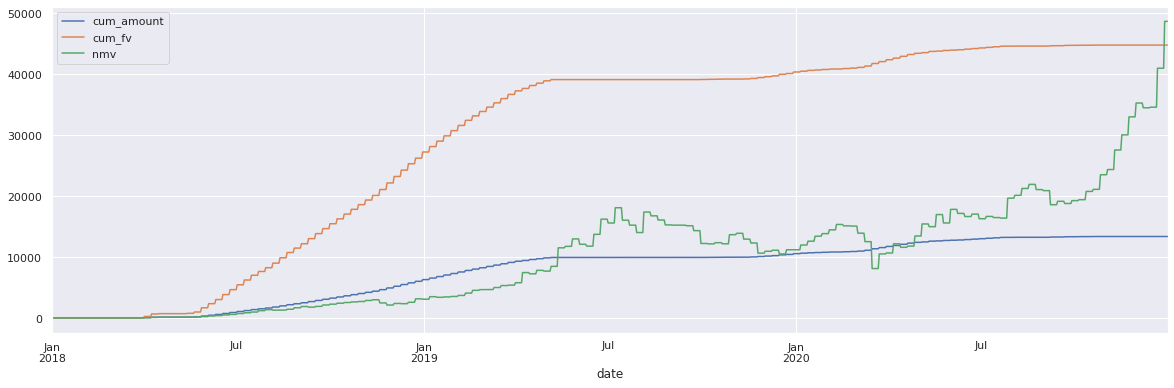

In [19]:
dca_bges_long.set_index('date')[['cum_amount','cum_fv','nmv']].fillna(method='ffill').plot(figsize=(20,6))

## DCA by BIAS_GRID_EQUAL_SIZE (allow sell)

In [22]:
config = {'strategy': 'BIAS_GRID_EQUAL_SIZE',
          'ma_ndays': ma_ndays,
          'allow_sell': True,
          'start_dateid': start_dateid,
          'end_dateid': end_dateid,
          'dca_base_amount': 100.0,
          'markup_ratio': 0.4,
          'investment_ratio_interval': 0.3,
          'growth_rate': 1.0}

dca_bges = calc_dca(historical_prices=historical_prices, config=config)
dca_bges.tail()

,date,adjClose,day_of_week,ma,bias,bias_mean,bias_std,di,investment_ratio,amount,sided_qty,cum_sided_qty,nmv,cum_amount,investment_gain_ratio,ttm,fv,cum_fv
1091,2020-12-27,26272.294922,6,10899.554297,1.410401,0.224098,0.341257,3.476270,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1092,2020-12-28,27084.808594,0,10953.423217,1.472725,0.228116,0.347265,3.584031,-0.8,-80.0,-0.00211,1.592466,43131.648973,10480.0,4.115615,3,-80.457069,41184.792013
1093,2020-12-29,27362.437500,1,11008.407990,1.485594,0.232220,0.353216,3.548467,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1094,2020-12-30,28840.953125,2,11067.715810,1.605863,0.236694,0.360194,3.801193,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1095,2020-12-31,29001.720703,3,11127.446074,1.606323,0.241171,0.366990,3.719863,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


<AxesSubplot:xlabel='date'>

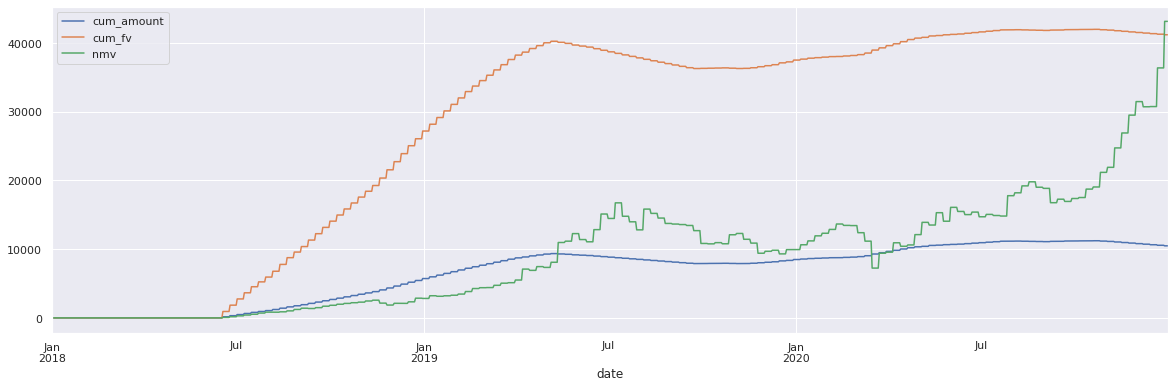

In [23]:
dca_bges.set_index('date')[['cum_amount','cum_fv','nmv']].fillna(method='ffill').plot(figsize=(20,6))